# Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)


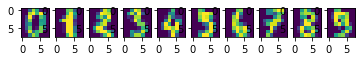

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

#Affichacge des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
    
plt.show()

In [29]:
"""Pour ce TP, nous allons utiliser comme classifieur de base un arbre de 
décision DecisionTreeClassifier. Ce classifieur nous permet d’établir des 
performances de référence (c’est un ensemble à 1 modèle)."""

import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X,y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [30]:
from sklearn.model_selection import train_test_split
#90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z= clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7021013597033374


In [31]:
""" construire la variance de la valeur accuracy sur 100 tirages 
pour la séparation aprentissage/test"""

N = 100
accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])
    
print(np.mean(accuracies),np.std(accuracies))

0.8111111111111111
0.8666666666666667
0.8888888888888888
0.8444444444444444
0.8666666666666667
0.7888888888888889
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8333333333333334
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.8888888888888888
0.8888888888888888
0.8444444444444444
0.8888888888888888
0.8444444444444444
0.9111111111111111
0.8333333333333334
0.9111111111111111
0.8333333333333334
0.9111111111111111
0.8666666666666667
0.8666666666666667
0.9111111111111111
0.8333333333333334
0.8222222222222222
0.9222222222222223
0.8444444444444444
0.9222222222222223
0.9
0.8555555555555555
0.9
0.9555555555555556
0.8222222222222222
0.8888888888888888
0.8555555555555555
0.7888888888888889
0.8888888888888888
0.8555555555555555
0.8222222222222222
0.8666666666666667
0.8333333333333334
0.8888888888888888
0.8555555555555555
0.8777777777777778
0.8444444444444444
0.8333333333333334
0.8777777777777778
0.8888888888888888
0.8444444444444444
0.8777777777777778
0.81

In [32]:
#construire un classifieur bagging sur les données
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [33]:
#Apprentissage et évalutation de l'ensemble
clf.fit(X_train,y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

In [34]:
print(accuracy)

0.9555555555555556


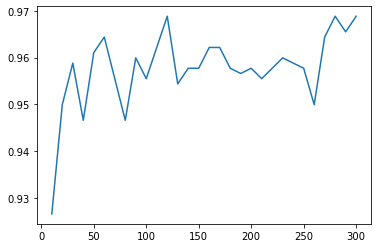

In [35]:
#Construire le graphique accuracy vs n_estimators
N = 30
accuracy = []

for i in range(N):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf.fit(X_train,y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test, y_test))
    
import matplotlib.pyplot as plt

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [36]:
#Pour chercher de bonnes valeurs pour paramètres , GridSearchCV

digits = load_digits()
X = digits.data
y = digits.target
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV

pgrid = {"max_samples": [0.2,0.3, 0.4,0.5, 0.6, 0.8],
        "max_features": [0.2,0.3, 0.4,0.5, 0.6, 0.8]}

grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_sample : " + str(grid_search.best_estimator_.max_samples))
print("max_features : " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9110122358175751
max_sample : 0.8
max_features : 0.5


In [39]:
#Forêts aléatoires
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X = digits.data
y = digits.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.90)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
#Comment la valeur variable accuracy se comprare entre bagging forêts aléatoires

clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres): " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres)" + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6724351050679852
Bagging (200 arbres): 0.8856613102595797
Forêt aléatoire (200 arbres)0.8936959208899876


In [44]:
#Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test

N=10
bagging_accuracies = []
for i in range(N):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train,y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))
    
print(np.mean(bagging_accuracies), np.std(bagging_accuracies))

rf_accuracies =[]
for i in range(N):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train,y_train)
    rf_accuracies.append(clf.score(X_test,y_test))
    
print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9334816462736374 0.010057979582164457
0.9587319243604003 0.004960868325022853


10 0.9232480533926585
20 0.9555061179087876
30 0.9555061179087876
40 0.9632925472747497
50 0.9666295884315906
60 0.967741935483871
70 0.9655172413793104
80 0.9688542825361512
90 0.9699666295884316
100 0.967741935483871
110 0.9699666295884316
120 0.96440489432703
130 0.9688542825361512
140 0.9699666295884316
150 0.967741935483871
160 0.967741935483871
170 0.9710789766407119
180 0.9666295884315906
190 0.9666295884315906
200 0.9666295884315906
210 0.9710789766407119
220 0.9655172413793104
230 0.9688542825361512
240 0.9655172413793104
250 0.9666295884315906
260 0.9688542825361512
270 0.9699666295884316
280 0.9688542825361512
290 0.9699666295884316
300 0.9688542825361512


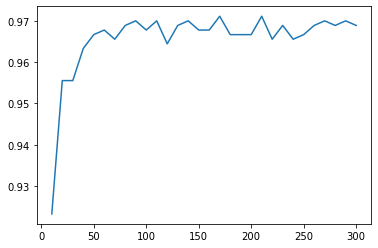

In [46]:
#Construire graphique accuracy vs n_estimator
N=30
accuracy=[]

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train,y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])
    
plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [52]:
"""Extra-Trees  randomisent encore plus la construction de l'arbre et sont utilisés surtout pour des données numériques.
Par rapport au random forest, ils abandonnent l'utilisation des échantillons de bootstrap et pour chaque feature candidat
choisissent un seuil de coupeur aléatoire. Bien pour des problèmes d'apprentissage avec un grand nombre de features
qui varient de manière continue. SOuvent leur taux d'erreur est supérieur aux random forest, temps de calcul pluis faible, 
arbres générés plus grand"""

from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9588431590656284
Extra Trees : 0.9744160177975528


In [55]:
#Boosting
"""Le principe est d'évaluer une séquence de classifieurs faibles (weak learners) sur plusieurs versions légèrement
mdofiées des données d'apprentissage. Les décisions obtenues sont alors combinées par une somme ponderée pour obtenir le 
modèle final."""

from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X= digits.data
y=digits.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.90)

#AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(f"Accuracy = {accuracy}")

Accuracy = 0.92336217552534
